In [168]:
import numpy as np;
import matplotlib.pyplot as plt
from astropy.io import fits
import math
from scipy.optimize import curve_fit
import glob
import os
import sys
import matplotlib.backends.backend_pdf
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from scipy.stats import lognorm
from scipy import linalg
import pprint
import re
plt.rc('font', family='serif')
from matplotlib import rc
import pandas as pd
from astropy import constants as const
from astropy import units as units
from IPython.display import Markdown as md
import sympy
from sympy import integrate, diff, sqrt, cos, sin, pi, exp, log
from sympy.abc import * 
i = sqrt(-1)
import numpy as np
import sympy.printing as printing
latp = printing.latex
hbar = sympy.symbols("hbar", real=True)
hbar

hbar

Where $B$ is the spectral radiance and $f$ is the frequency, we have Planck's law of Blackbody Radiation. We will be using CGS units.

In [169]:
def B(T, l, use_cgs = False):
    if use_cgs:
        k_B = const.k_B.value
        h = const.h.value
        c = const.c.value
    else:
        k_B, h, c = sympy.symbols("k_B h c")
    return 2*h* ( ( c / l )**3 ) / (c**2 * (exp(h / (l * k_B * T)) - 1))
md("In CGS units, we have " + "\\begin{equation} B_l = " + latp(B(T,l))
   + "\\end{equation}")

In CGS units, we have \begin{equation} B_l = \frac{2 c h}{l^{3} \left(e^{\frac{h}{T k_{B} l}} - 1\right)}\end{equation}

In [189]:
from sympy.plotting import plot
def plot_planck(T):
    b_fun = sympy.lambdify(l, B(T, l, True))
    plt.figure(dpi = 800)
    wavelengths = np.linspace(350 * 10**-9, 1600 * 10**-9, 10**5)
    radiances = [b_fun(l) for l in wavelengths]
    plt.scatter(wavelengths, radiances)
    plt.xlabel("Wavelength (m)")
    plt.grid()
    plt.ylabel("Spectral Radiance (W Hz$^{-1}$ sr$^{-1}$ m$^2$)") 
    plt.title("Planck Function for a Perfect Blackbody at " + str(T) + " Kelvin")
    '''
    plot(b_fun, xlim = (350 * 10**-9, 1600 * 10**-9), ylim=(.9,10),
        adaptive = False, nb_of_points = 10**8, yscale="log", xlabel = "Wavelength (nm)",
        title = "Planck Function for Blackbody at " + str(T) + " Kelvin",
        ylabel = "Spectral Radiance (W Hz$^{-1}$ sr$^{-1}$ m$^2$)")
    '''
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

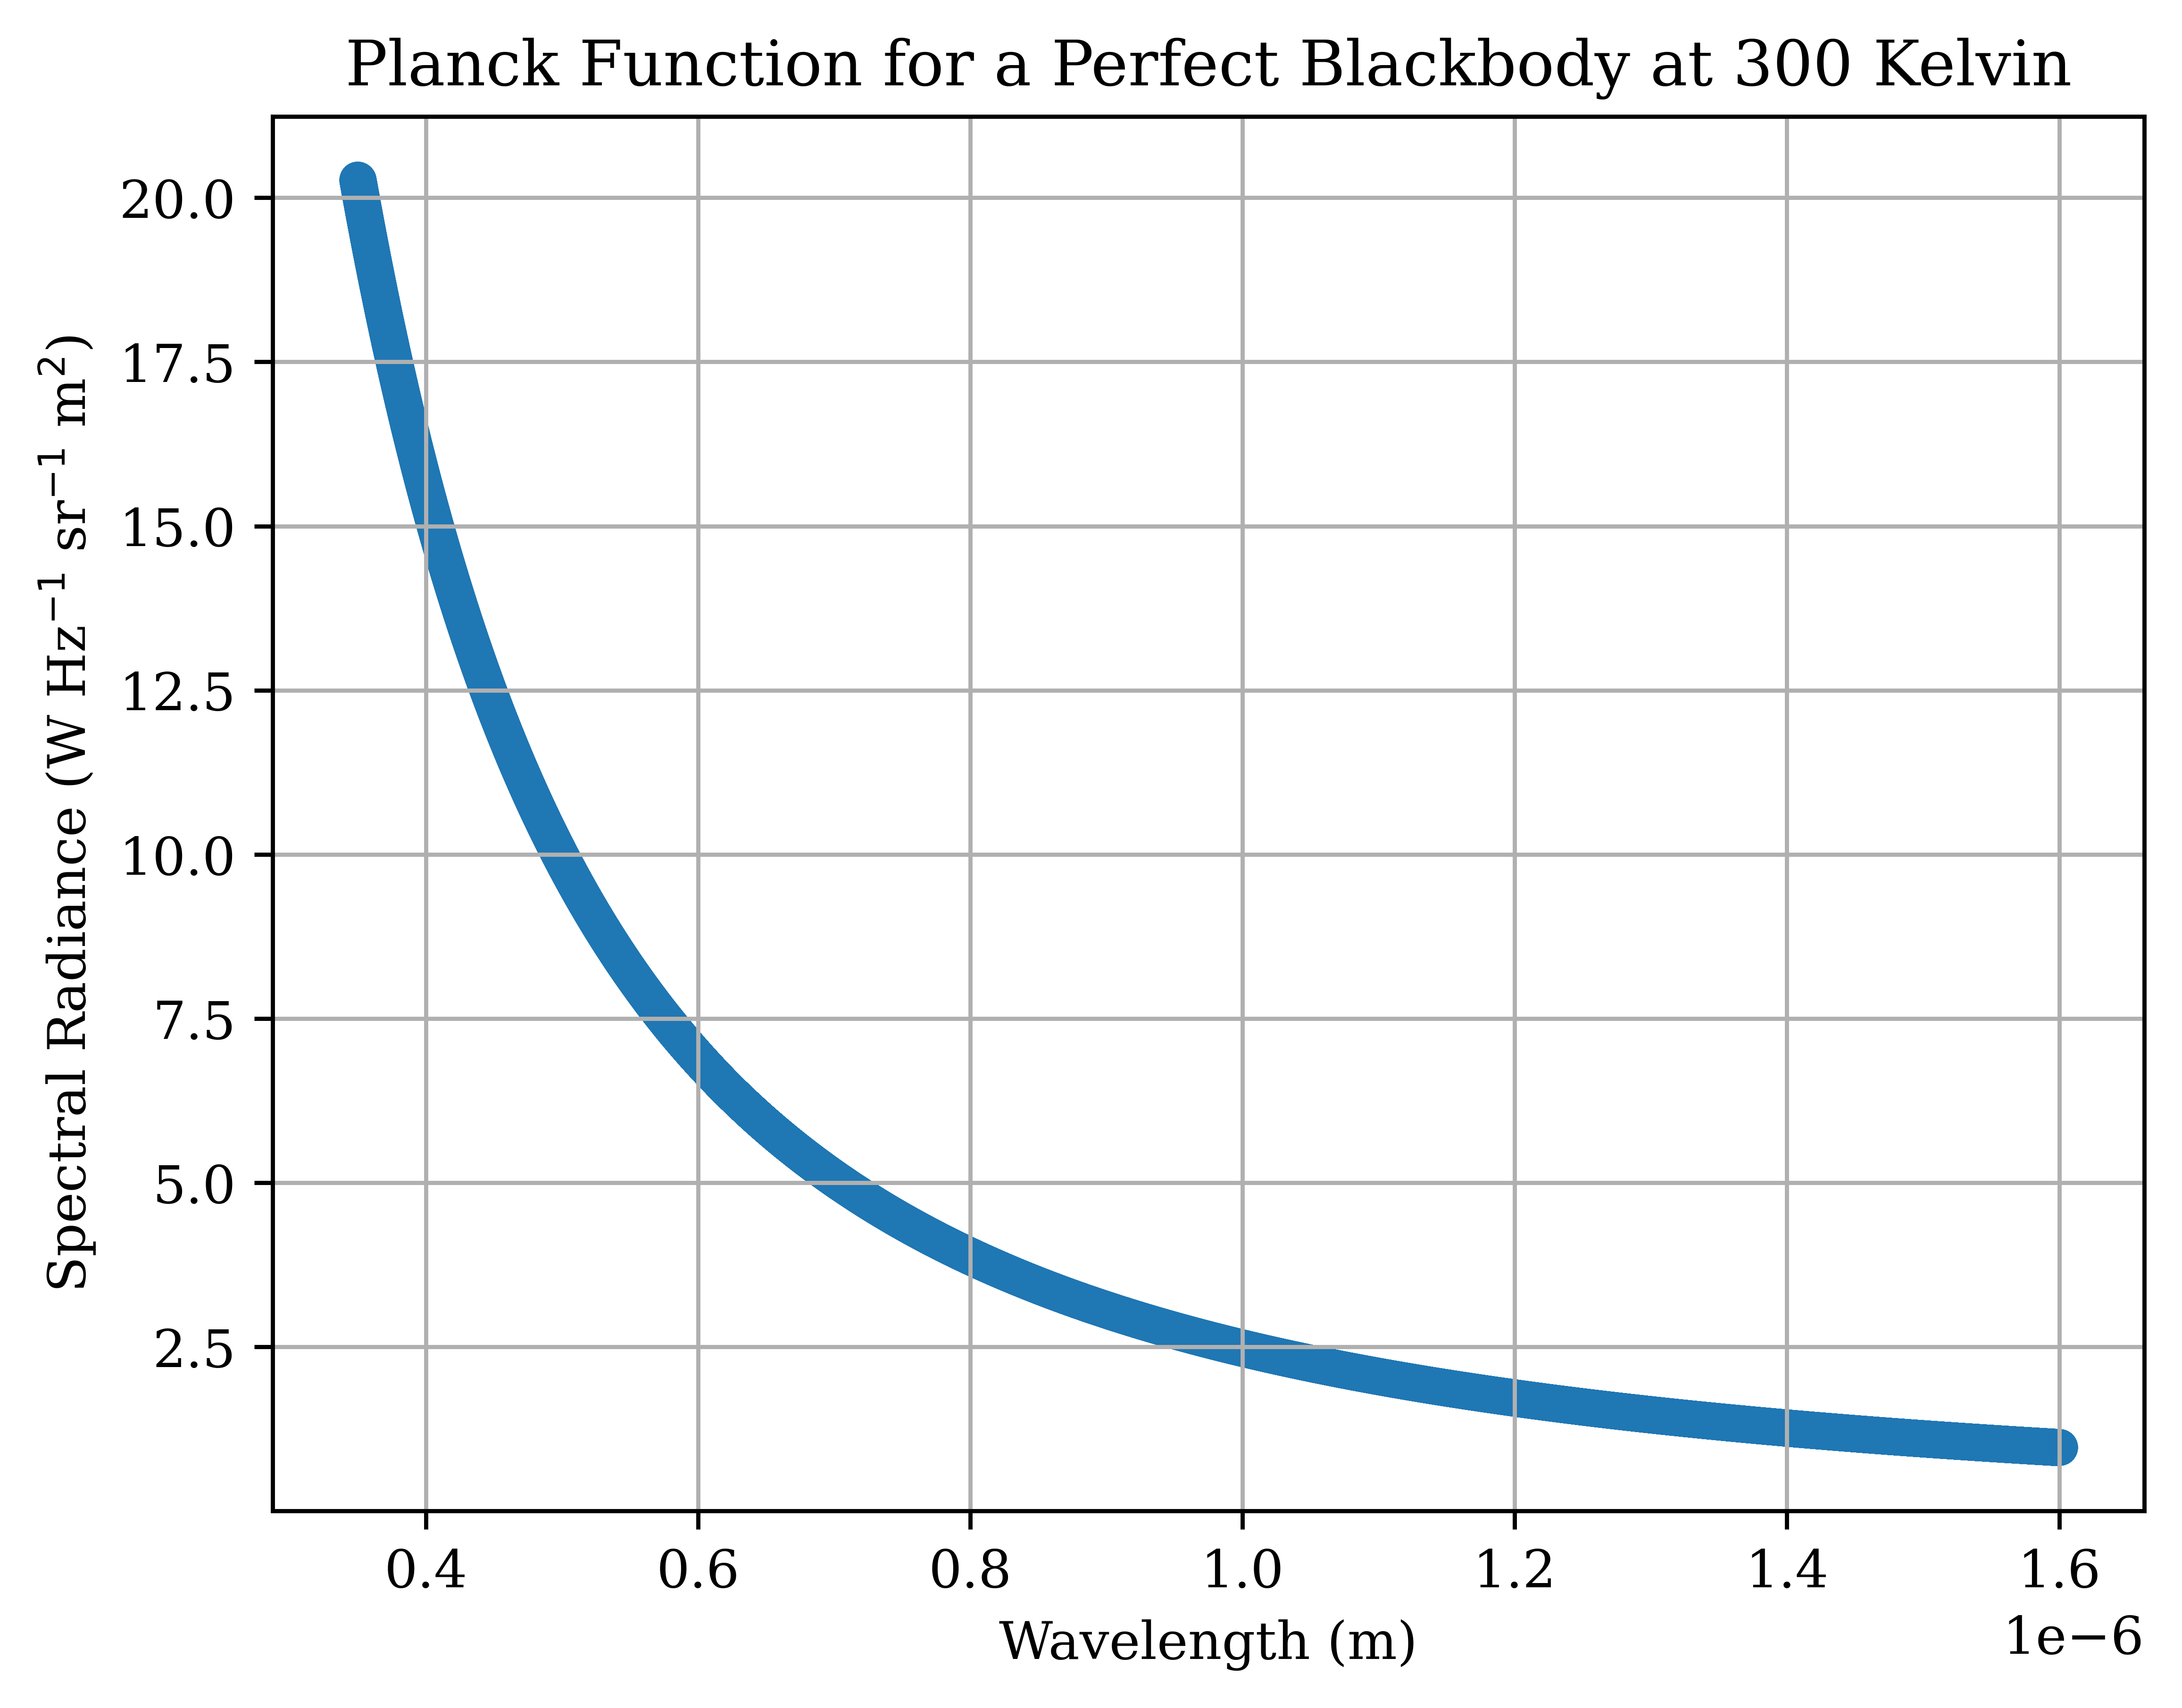

In [190]:
plot_planck(300)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

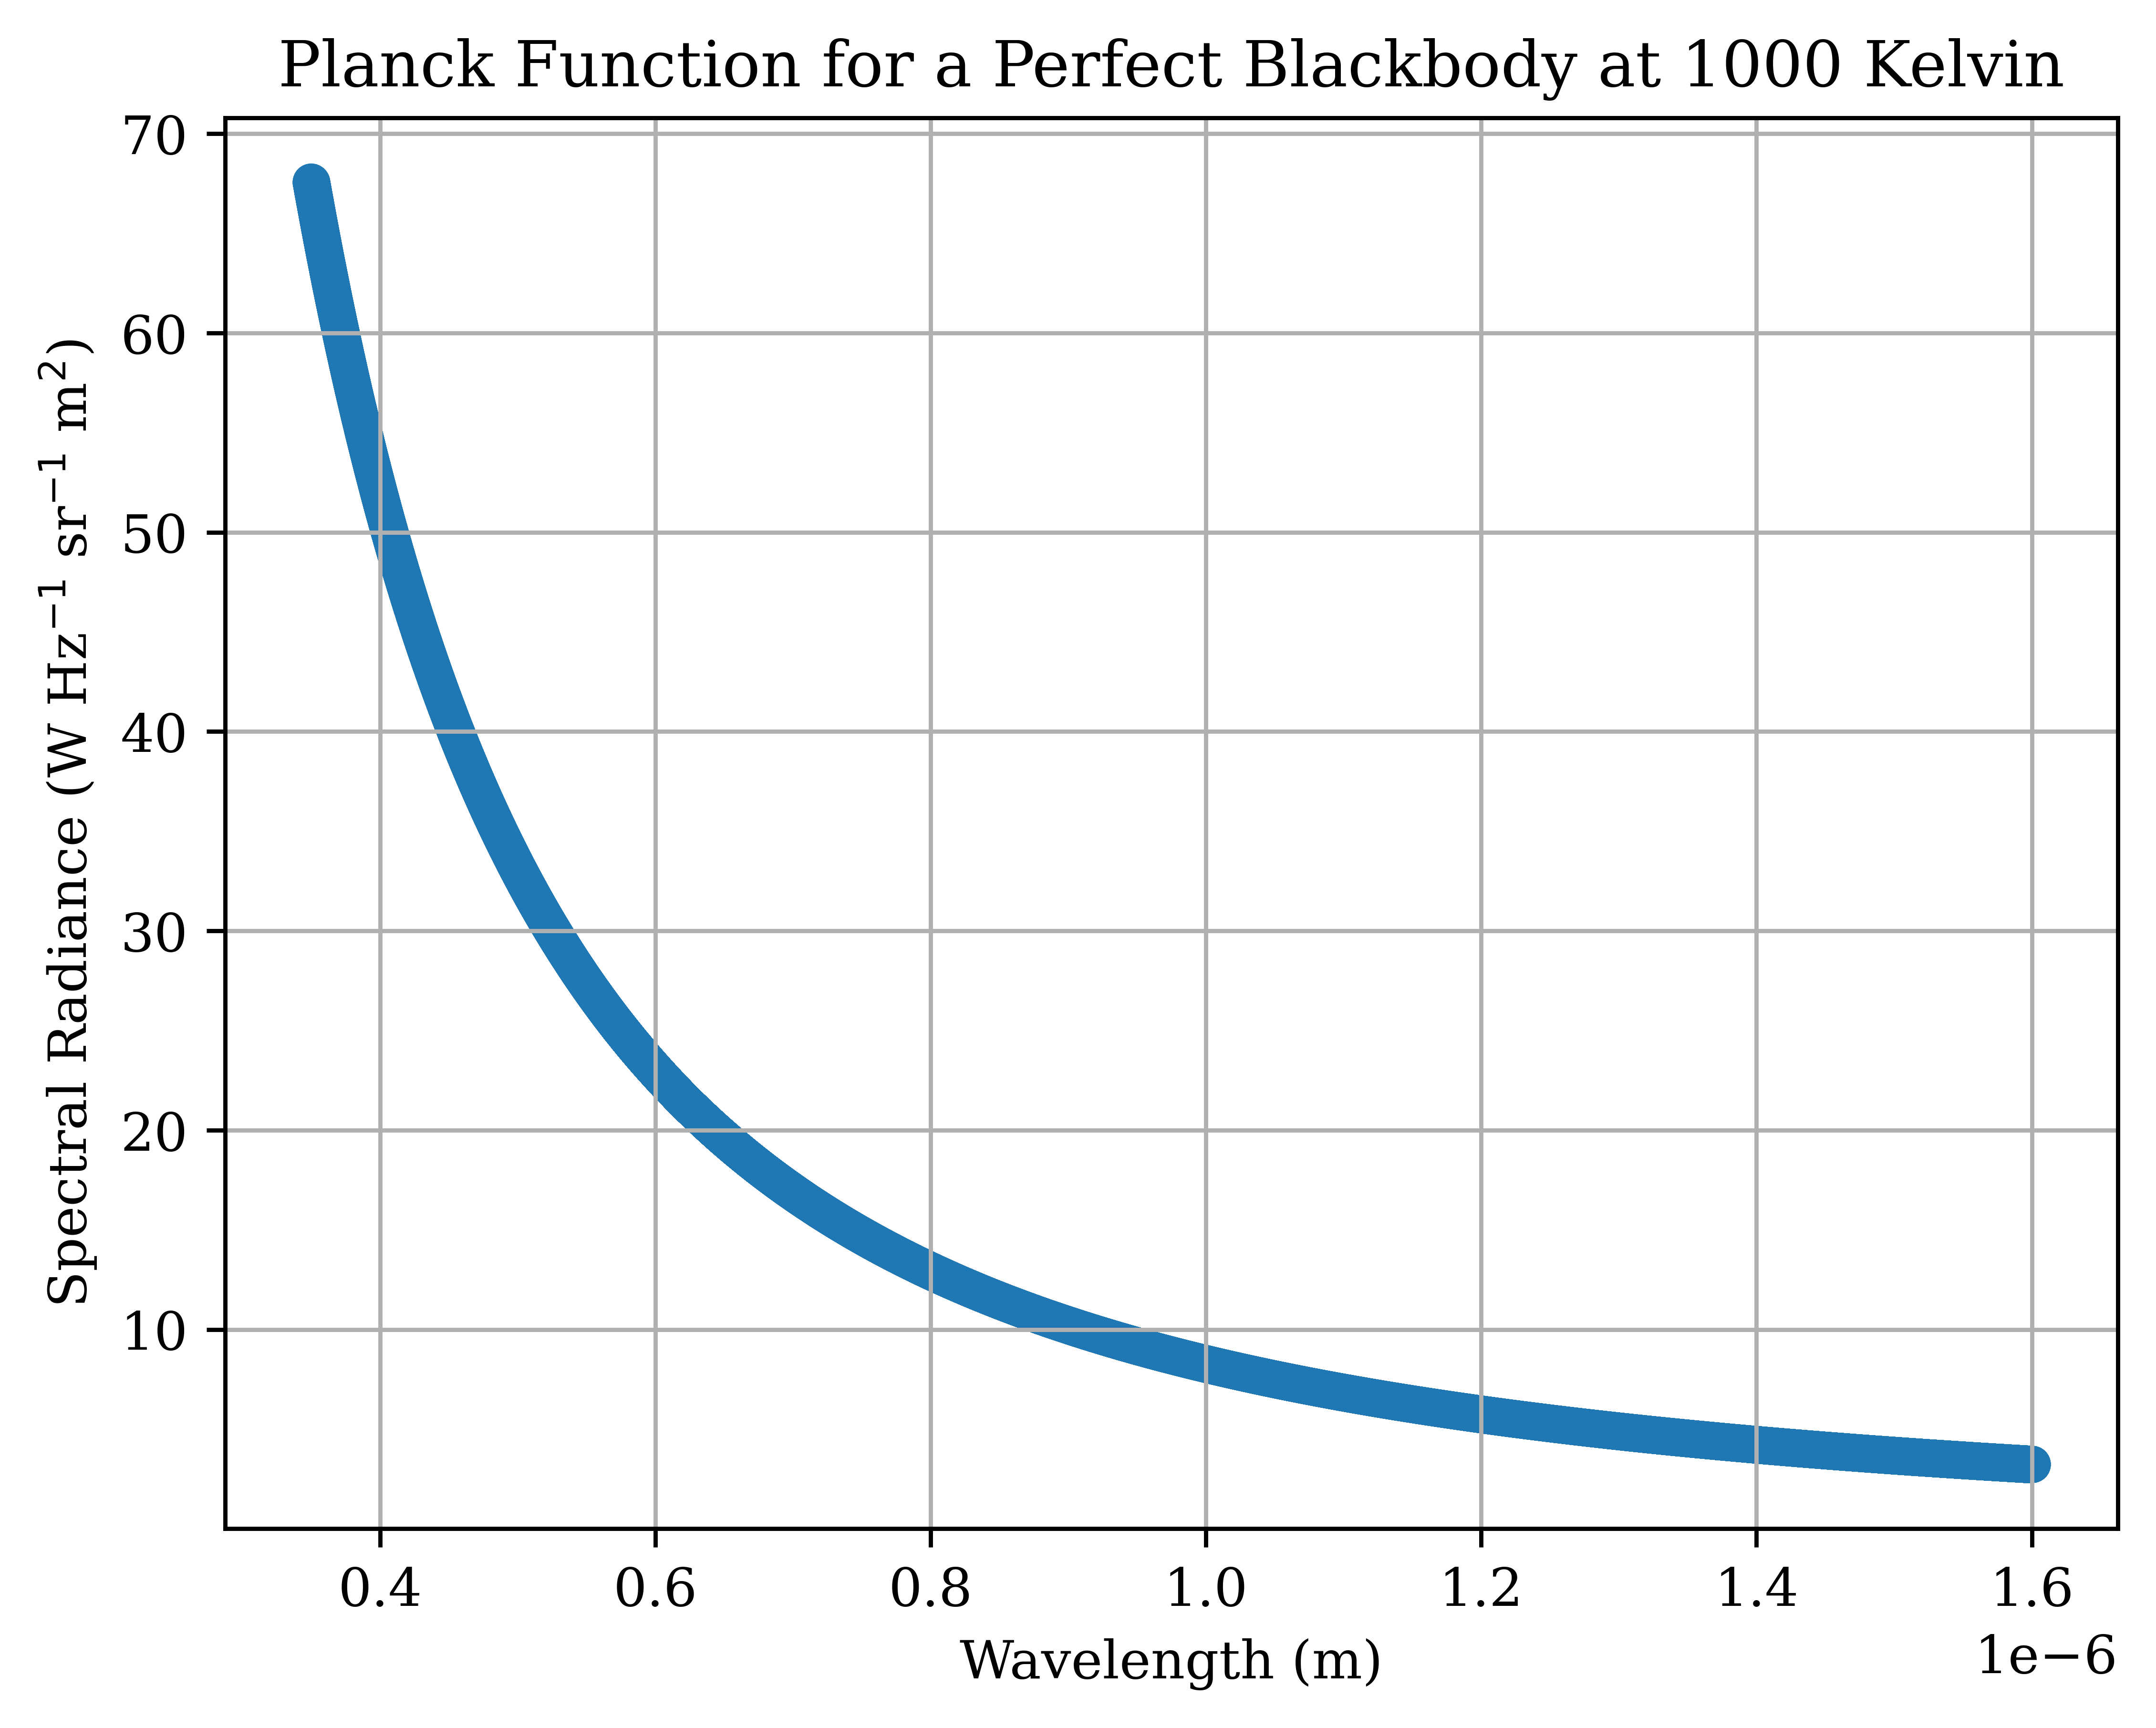

In [191]:
plot_planck(1000)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

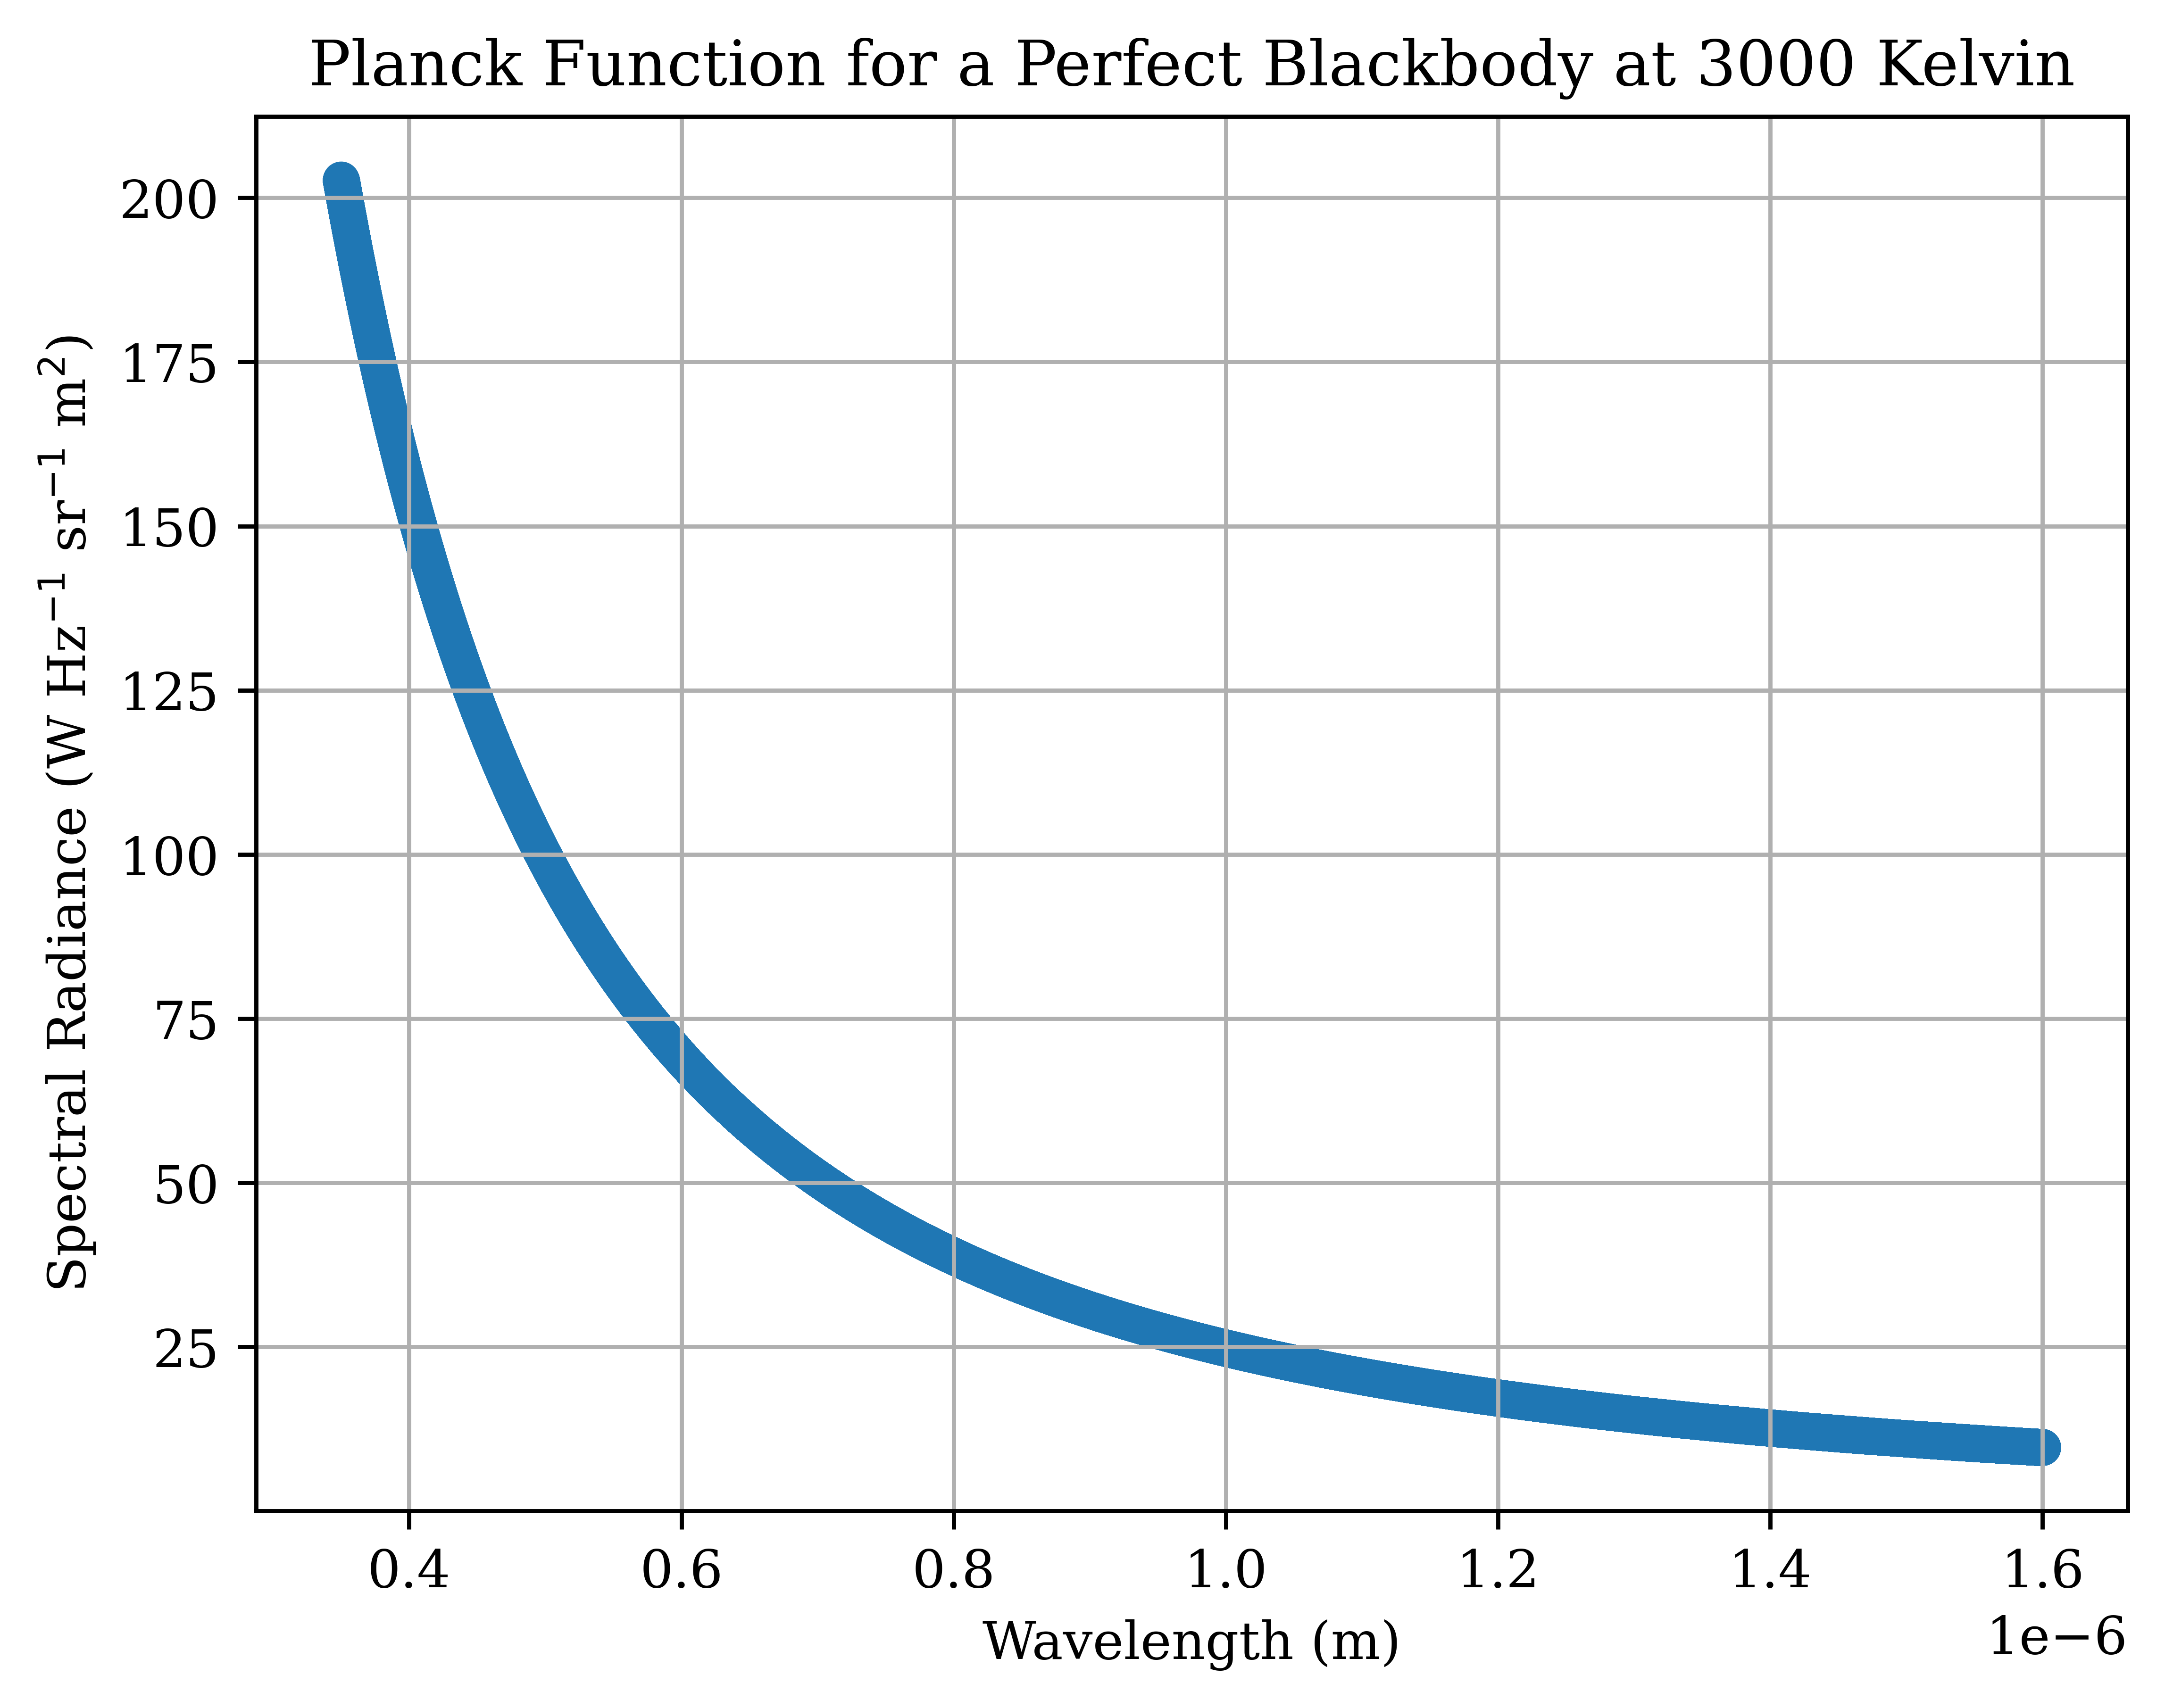

In [192]:
plot_planck(3000)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

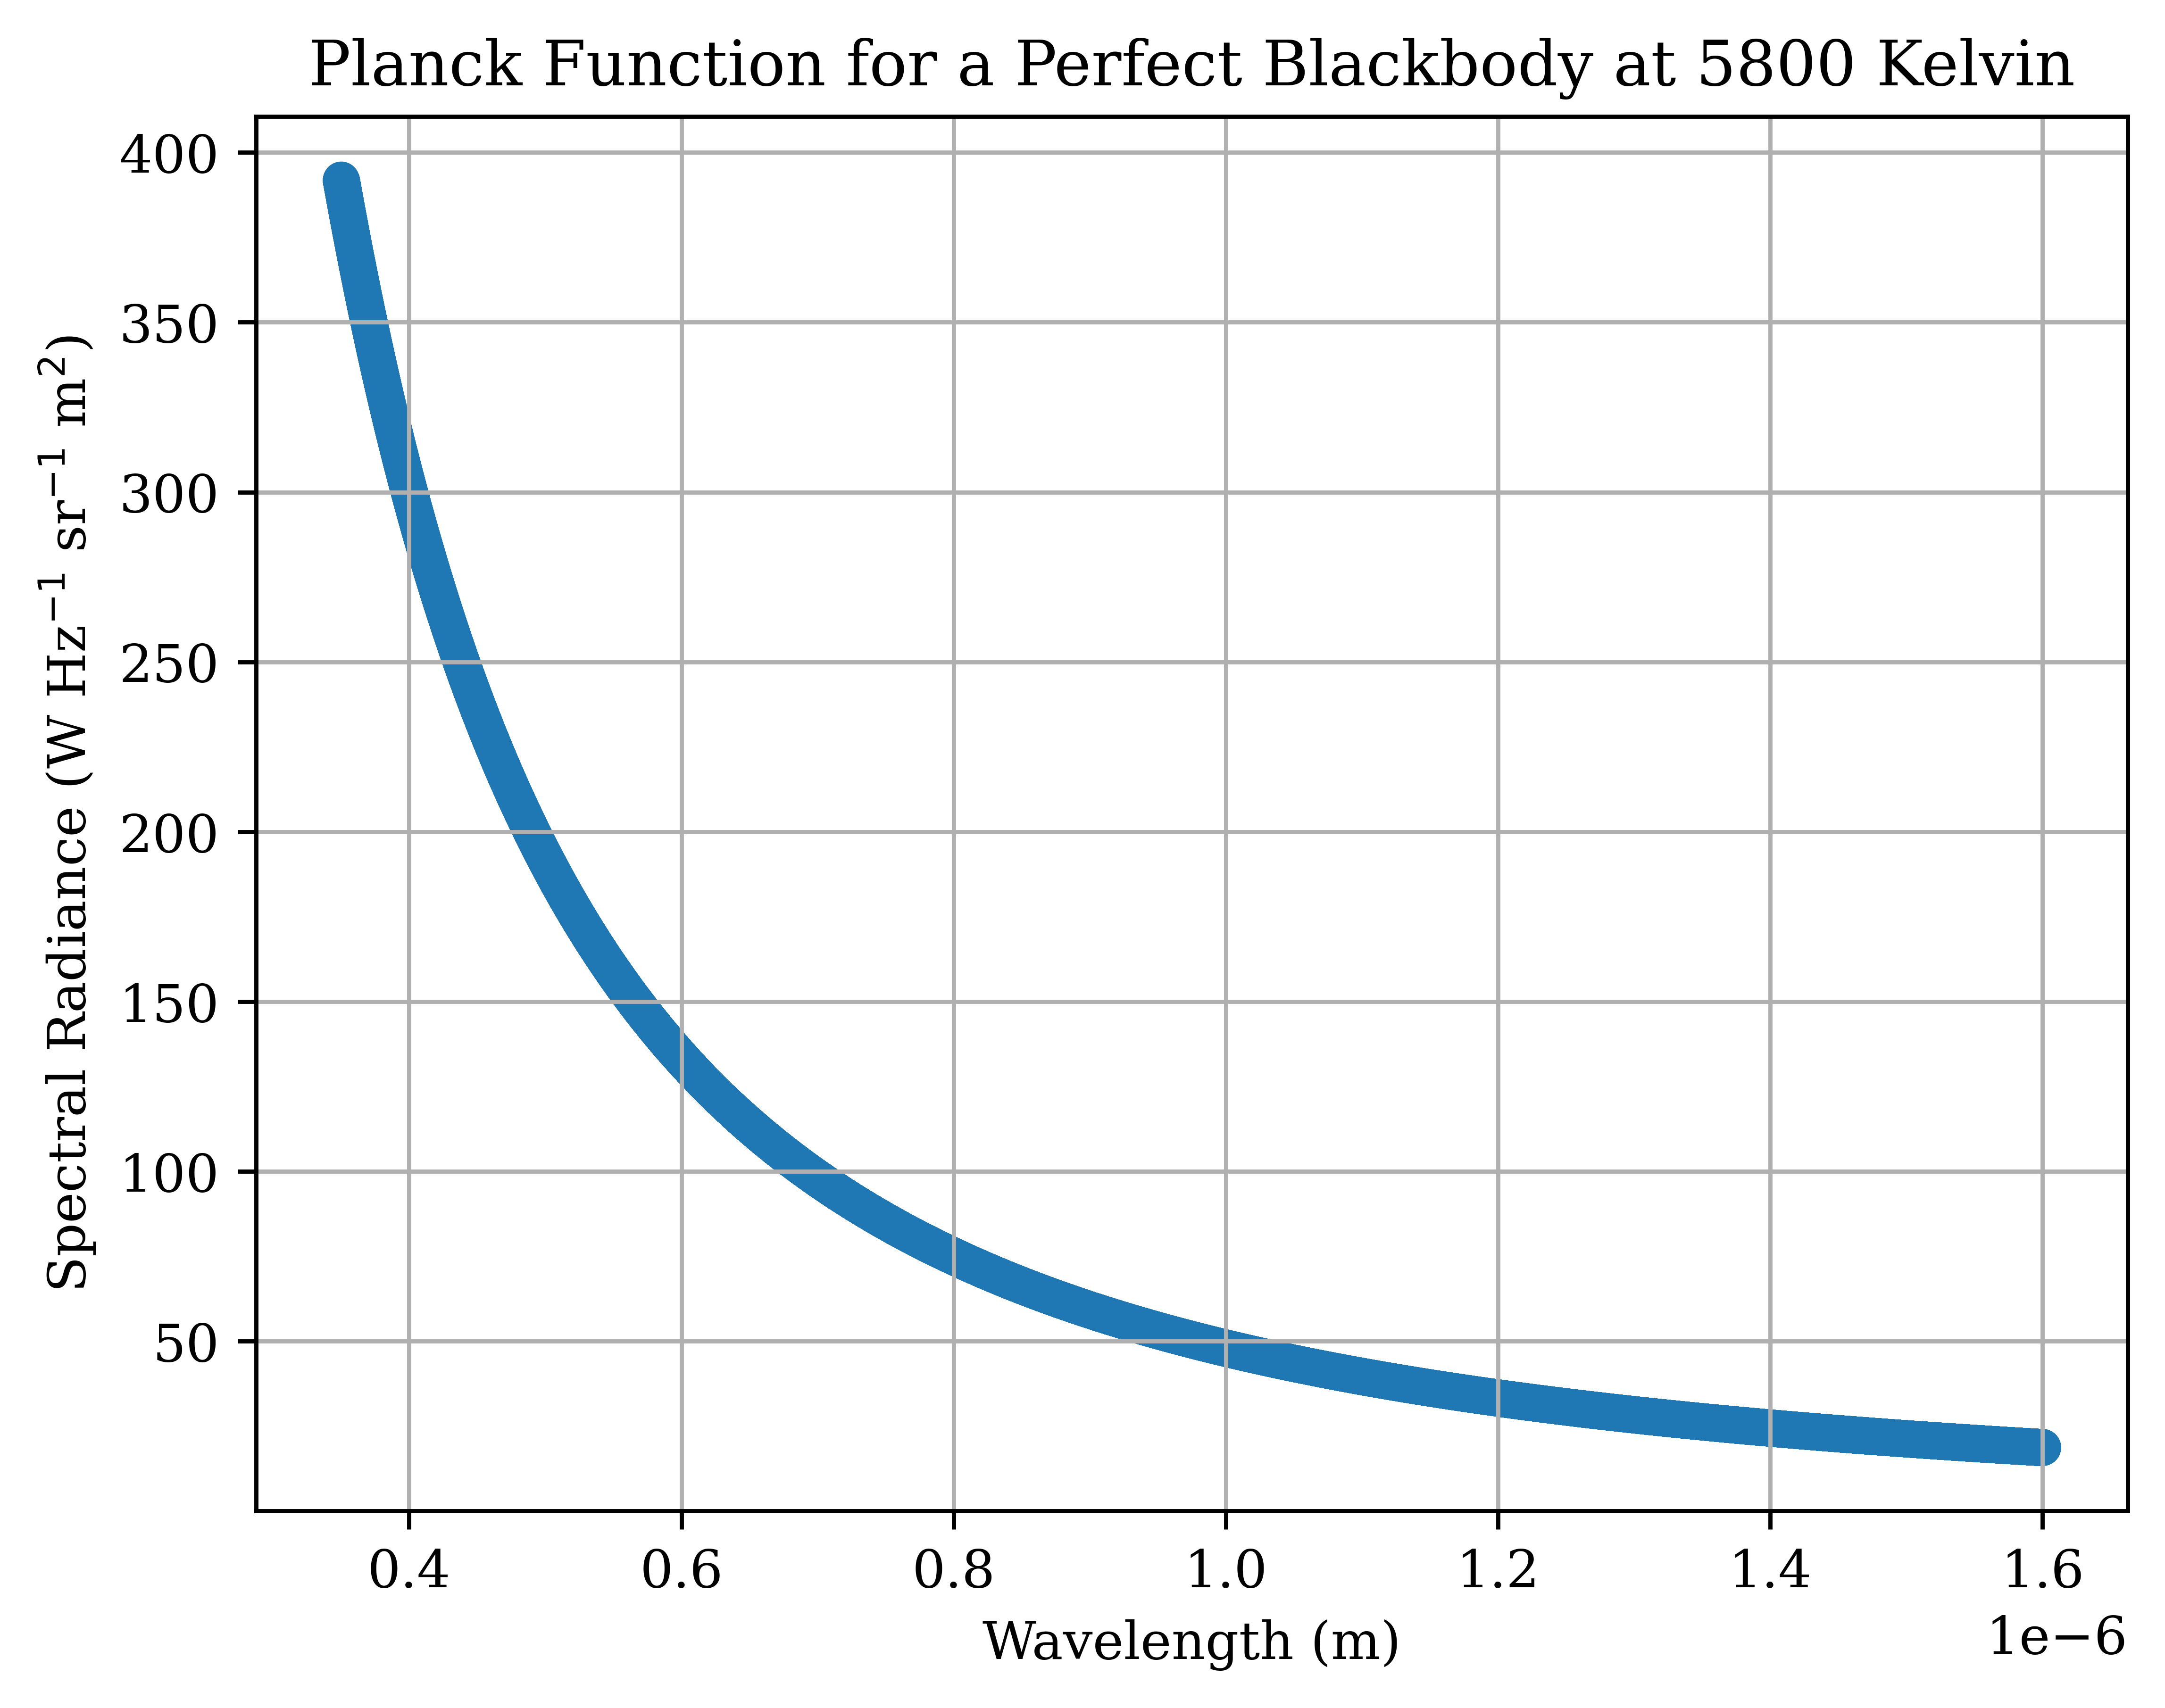

In [194]:
plot_planck(5800)

In [107]:
B(300, 1600 * 10**-9, True)

9.31062623605445e-21

In [113]:
(2.99 * units.mm / 300).to(units.m)

<Quantity 9.96666667e-06 m>

In [110]:
B(T, l, True) * 10**9

35.7065700278579/(l**3*(8.98755178736818e+16*exp(0.0143877687750393/(T*l)) - 8.98755178736818e+16))

In [172]:
my_fun = sympy.lambdify(l, B(300, l, True))
my_fun(1000)

2.231660626741119e-18

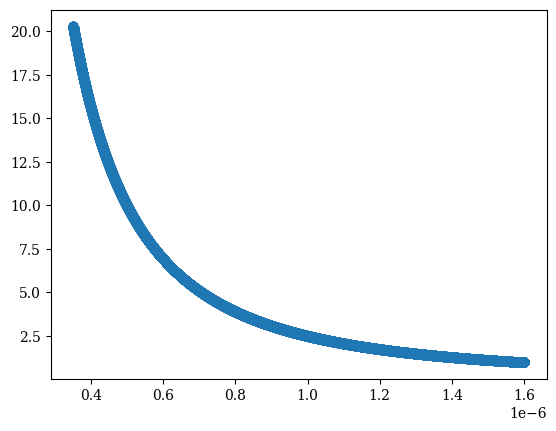

In [176]:
wavelengths = np.linspace(350 * 10**-9, 1600 * 10**-9, 10**5)
radiances = [my_fun(l) for l in wavelengths]
plt.scatter(wavelengths, radiances)